## Lecture 7 – Data 100, Spring 2022

by Josh Hug

adapted from material by Ani Adhikari, Suraj Rampure, and Fernando Pérez.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
births = pd.read_csv('baby.csv')

In [4]:
plt.rcParams["hist.bins"]

10

In [5]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


In [6]:
births.shape

(1174, 6)

## Bar Plots

We often use bar plots to display distributions of a categorical variable:

In [7]:
births['Maternal Smoker'].value_counts()

False    715
True     459
Name: Maternal Smoker, dtype: int64

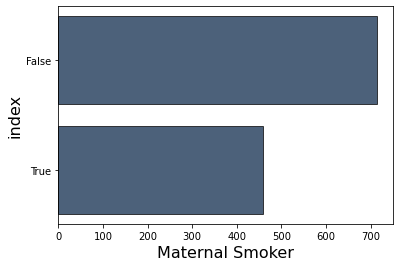

In [9]:
from datascience import Table #the lib is from data8
t = Table.from_df(births['Maternal Smoker'].value_counts().reset_index())
t.barh("index", "Maternal Smoker")

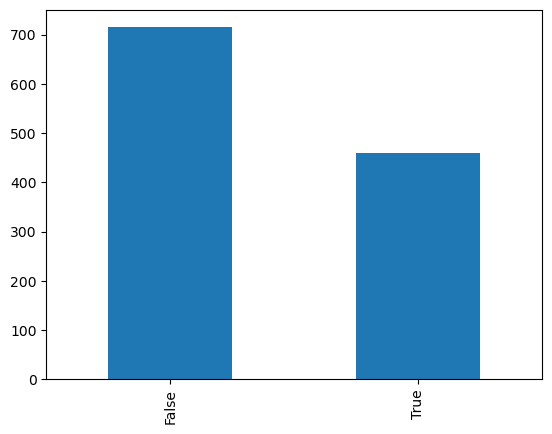

In [8]:
births['Maternal Smoker'].value_counts().plot(kind = 'bar');

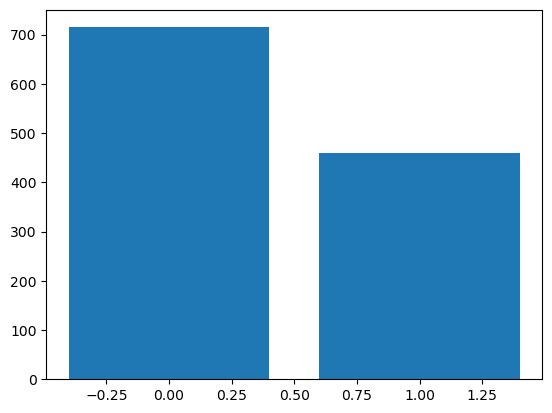

In [9]:
ms = births['Maternal Smoker'].value_counts();
plt.bar(ms.index, ms);

Note: putting a semicolon after a plot call hides all of the unnecessary text that comes after it (the `<matplotlib.axes_....>`).

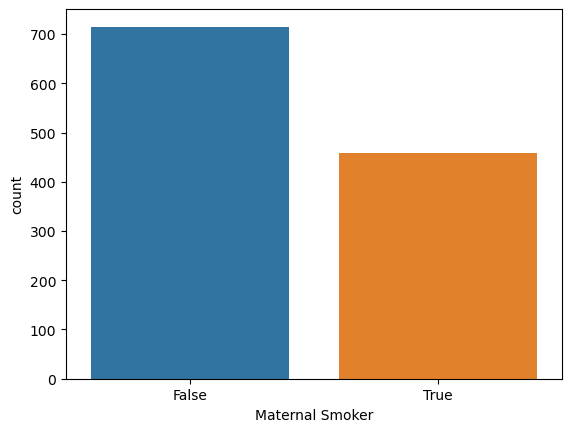

In [10]:
sns.countplot(data = births, x = 'Maternal Smoker');

In [11]:
import plotly.express as px
px.histogram(births, x = 'Maternal Smoker', color = 'Maternal Smoker')

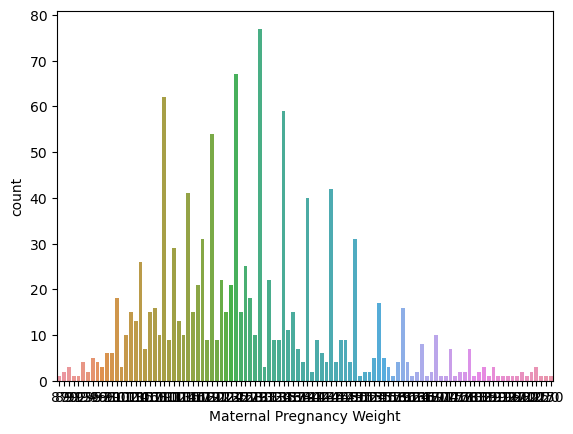

In [12]:
sns.countplot(data = births, x = 'Maternal Pregnancy Weight');

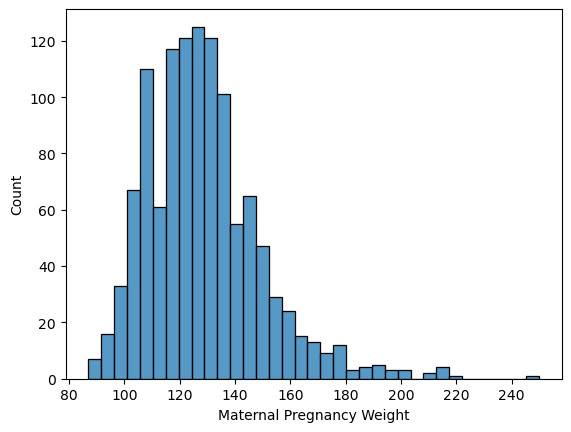

In [13]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight');

In [14]:
px.histogram(births, x = 'Maternal Pregnancy Weight')

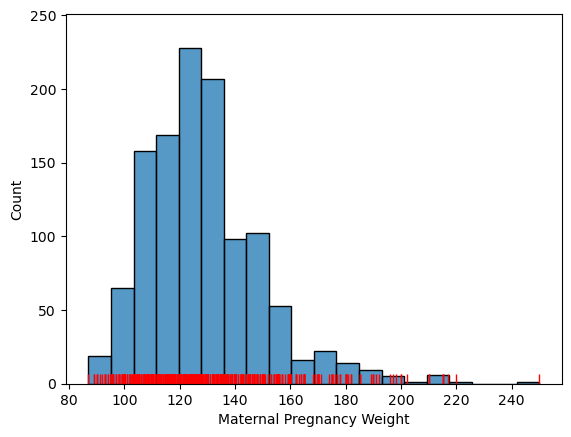

In [15]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', bins = 20);
sns.rugplot(data = births, x = 'Maternal Pregnancy Weight', color = "red");

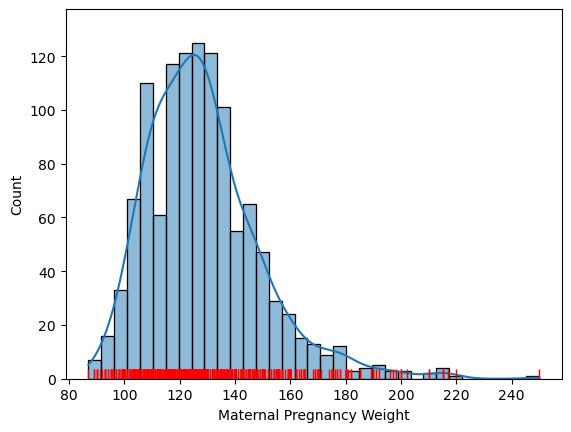

In [16]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', kde = True);
sns.rugplot(data = births, x = 'Maternal Pregnancy Weight', color = "red");

## Box Plots

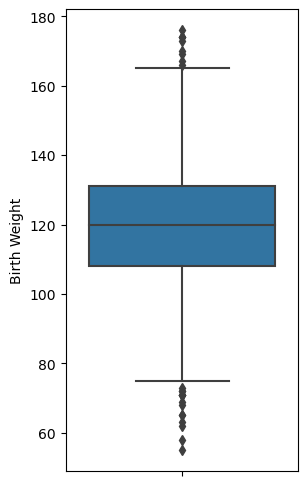

In [17]:
plt.figure(figsize = (3, 6))
sns.boxplot(y = "Birth Weight", data = births);

In [20]:
bweights = births["Birth Weight"]
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, q2, q3, whisk2

(73.5, 108.0, 120.0, 131.0, 165.5)

## Violin Plots

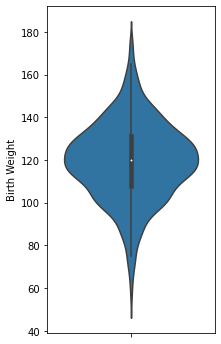

In [22]:
plt.figure(figsize = (3, 6))
sns.violinplot(y=births["Birth Weight"]);

## Side by side box plots and violin plots

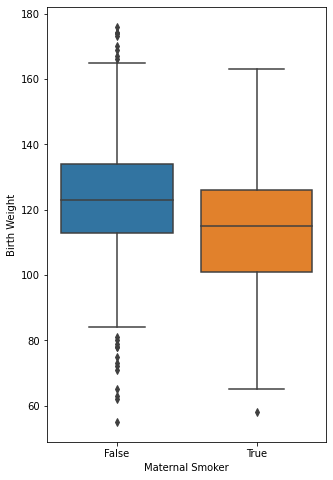

In [58]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

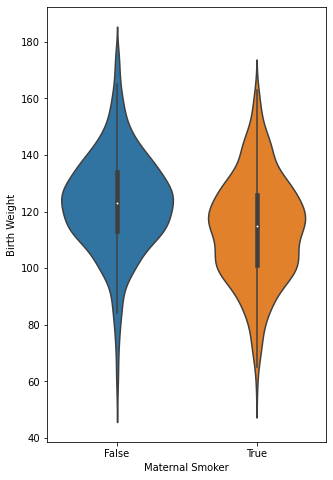

In [59]:
plt.figure(figsize=(5, 8))
sns.violinplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');

## Scatter plots

In [20]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


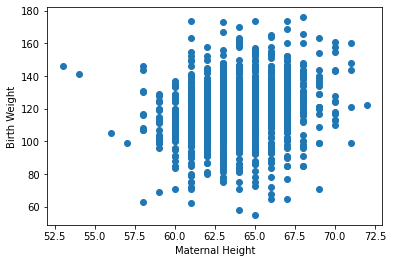

In [27]:
plt.scatter(births['Maternal Height'], births['Birth Weight']);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

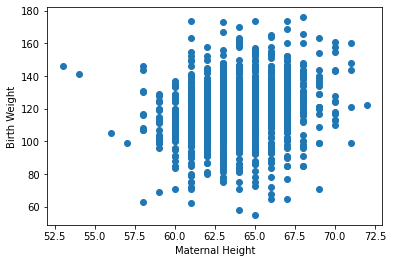

In [28]:
plt.scatter(data=births, x='Maternal Height', y='Birth Weight');
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');

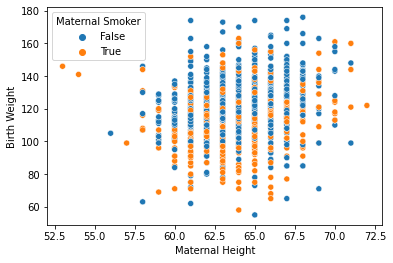

In [29]:
sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');

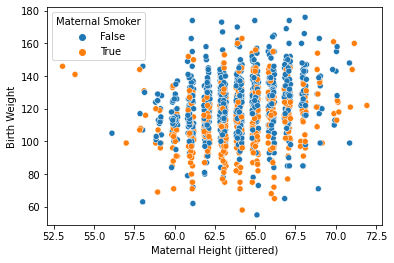

In [38]:
births["Maternal Height (jittered)"] = births["Maternal Height"] + np.random.uniform(-0.2, 0.2, len(births))
fig = sns.scatterplot(data = births, x = 'Maternal Height (jittered)', y = 'Birth Weight', hue = 'Maternal Smoker');

In [24]:
sns.lmplot(data = births, x = 'Maternal Height', y = 'Birth Weight', ci=False, hue='Maternal Smoker');

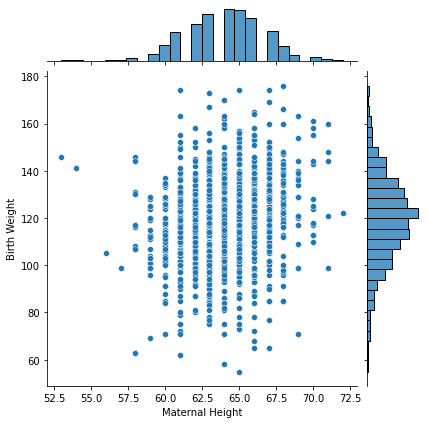

In [68]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight');

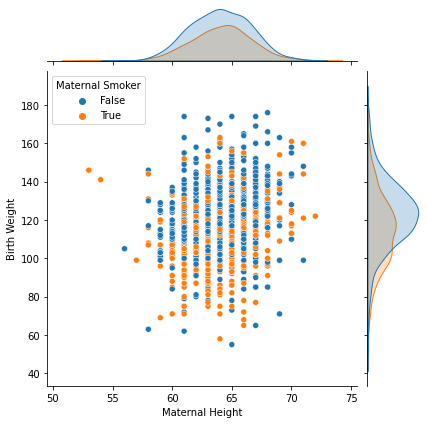

In [69]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue='Maternal Smoker');

## Hex plots and contour plots

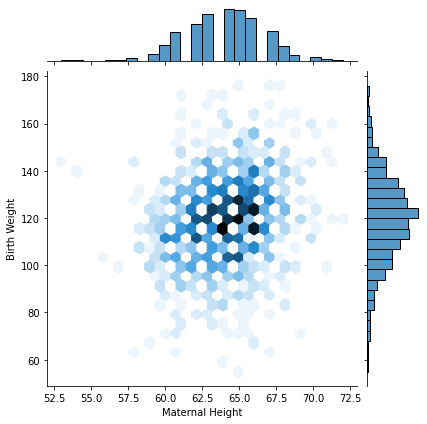

In [70]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='hex');

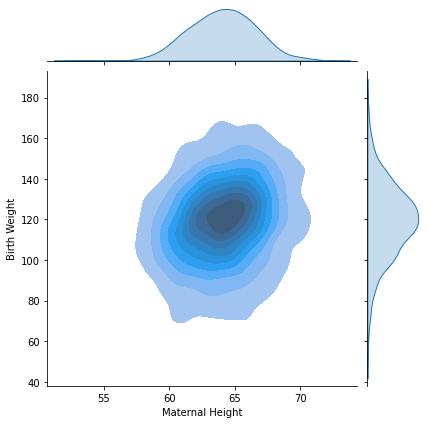

In [71]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='kde', fill=True);

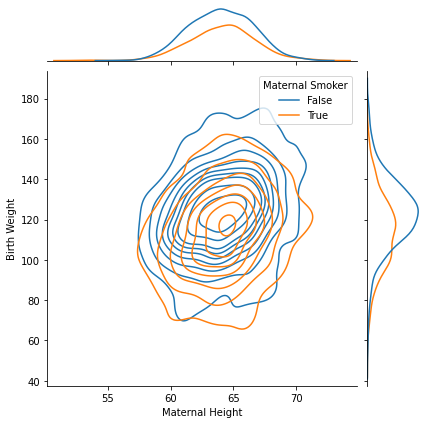

In [72]:
sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='kde', hue='Maternal Smoker');

## Bonus

Calling the DataFrame `.plot()` method results in weird things!

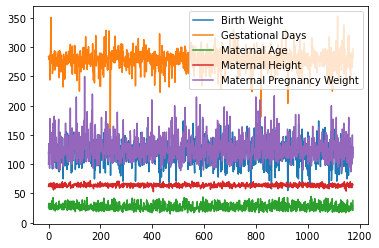

In [23]:
births.plot();